In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SMAPE Calculator (competition-metric taken from geeksforgeeks)
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [3]:
from dateutil.easter import easter
from datetime import datetime, date, timedelta
import holidays
from holidays import CountryHoliday

# Import data

In [4]:
train_data_ori = pd.read_csv('train.csv')
train_data_ori

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [5]:
test_data_ori = pd.read_csv('test.csv')
test_data_ori

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [6]:
train_data_ori.date = pd.to_datetime(train_data_ori.date)
test_data_ori.date = pd.to_datetime(test_data_ori.date)

# Feature Engineering

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

In [7]:
gdp_df = pd.read_csv('Gdp_data.csv', skiprows=4)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [439]:
def add_gdp(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
#     df[f'gdp_{2022}'] = 0
#     for year in years:
#         df[f'gdp_{year}'] = 0
    df['gdp'] = 0
    for c in list(set(train_data_ori.country)):
#         country_gdp = gdp_df.loc[gdp_df['Country Name']==c,'2017':'2022']
        for year in years:
            df['gdp'] = np.where(
                (df.country==c)&(df['Year']==year),np.log(gdp_df.loc[gdp_df['Country Name']==c, str(year)]/1e+9),df['gdp']
            )
    return df

In [390]:
country_gdp=gdp_df.loc[gdp_df['Country Name']=='Spain','2017':'2022']
# pd.DataFrame(preprocessing.normalize(country_gdp), columns=country_gdp.columns).mean().mean()
(country_gdp.mean().mean()/1e+9)

1371.8534565903847

Functions below provided by [RAVI RAMAKRISHNAN](https://www.kaggle.com/code/ravi20076/tpssep22-featureengineeringpipeline) on Kaggle and modified by me

In [227]:
def create_dateFeature(data):
    df = data.copy()
    df['Year'] = df.date.dt.year.astype(np.int16)
    df['Qtr'] = df['date'].dt.quarter.astype(np.int8)
    df["Month"] = df["date"].dt.month.astype(np.int8)
    df["Month_Sin"] = (np.sin(df['Month'] * (2 * np.pi / 12))).astype(np.float32)
    df["Day"] = df["date"].dt.day.astype(np.int16)
    df["Day_Sin"] = (np.sin(df['Day'] * (2 * np.pi / 12))).astype(np.float32)
    df["Weekday"] = df["date"].dt.dayofweek.astype(np.int8)
    df['Week_Nb'] = np.clip(df['date'].dt.isocalendar().week, a_min = 0, a_max= 52)
    df['Is_Weekend'] = np.where(df['Weekday'] >= 5,1,0)
    df["DayofYear"] = df["date"].dt.dayofyear
    df["is_fri"] = df["Weekday"]==4
    df["is_weekend"] = df["Weekday"]>4
    df["is_weekday"] = df["Weekday"]<4
    df['first_half'] = (df['Qtr']<3) 
    df['second_half'] = (df['Qtr']>2) 
    df["DayofYear"] = \
        df.apply(lambda x: x["DayofYear"]-1 
                 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  
                 else x["DayofYear"], axis=1)
    
    # covid dates
#     covid_concern = pd.Timestamp('2020-01-30')
    covid_pandemic = pd.Timestamp('2020-04-01')
#     arg_first_case = pd.Timestamp('2020-03-03')
#     can_first_case = pd.Timestamp('2020-01-27')
#     jp_first_case = pd.Timestamp('2020-01-16')
#     sp_first_case = pd.Timestamp('2020-01-31',)
#     es_first_case = pd.Timestamp('2020-02-27')
    
    df['world_covid'] = (df.date.dt.year==2020)
#     df['world_pandemic_covid'] = (df['date']==covid_pandemic)
        
    for day in (list(range(-5, 38))):
        df[f'covid_{day}'] = (df.date - covid_pandemic).dt.days.eq(day)
          
#     df.drop(['Day','Weekday'], axis=1, inplace=True)
        
    return df

In [120]:
def add_fourier(df):
    tempDf = df.copy()
    dayofyear = df.date.dt.dayofyear
    for k in range(1, 3):
        tempDf[f'sin{k}'] = np.sin(dayofyear / 365 * 2 * np.pi * k)
        tempDf[f'cos{k}'] = np.cos(dayofyear / 365 * 2 * np.pi * k)
        tempDf[f'IYC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'IYC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'TTL_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'TTL_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'WMKC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WMKC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WB_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Write Better']
        tempDf[f'WB_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Write Better']
    return tempDf

In [230]:
def make_features(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    return tempDf

In [440]:
train_eng = make_features(train_data_ori)
train_eng.set_index('date', drop=False, inplace=True)
train_eng.iloc[12000:12010]

adding date features ...
adding GDP features ...
adding dummies ...
adding fourier ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,sin2,cos2,IYC_sin2,IYC_cos2,TTL_sin2,TTL_cos2,WMKC_sin2,WMKC_cos2,WB_sin2,WB_cos2
date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000
2017-06-10,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.674444,0.738326
2017-06-10,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000


In [445]:
train_eng.loc[train_eng['gdp']>8]

,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,sin2,cos2,IYC_sin2,IYC_cos2,TTL_sin2,TTL_cos2,WMKC_sin2,WMKC_cos2,WB_sin2,WB_cos2
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,45,2017-01-01,167,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
2017-01-01,46,2017-01-01,162,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000
2017-01-01,47,2017-01-01,26,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
2017-01-01,48,2017-01-01,163,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,3.442161e-02,0.999407,0.000000e+00,0.000000
2017-01-01,49,2017-01-01,119,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,3.442161e-02,0.999407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136930,2021-12-31,645,2021,4,12,-2.449294e-16,31,-0.5,4,...,-4.898587e-16,1.000000,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
2021-12-31,136931,2021-12-31,648,2021,4,12,-2.449294e-16,31,-0.5,4,...,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
2021-12-31,136932,2021-12-31,104,2021,4,12,-2.449294e-16,31,-0.5,4,...,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000


# Building Models

In [190]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso

In [446]:
X = train_eng.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng['num_sold'].values).reshape(-1,1)

In [447]:
features = list(X.columns)
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_weekend', 'is_weekday', 'first_half', 'second_half', 'world_covid', 'covid_-5', 'covid_-4', 'covid_-3', 'covid_-2', 'covid_-1', 'covid_0', 'covid_1', 'covid_2', 'covid_3', 'covid_4', 'covid_5', 'covid_6', 'covid_7', 'covid_8', 'covid_9', 'covid_10', 'covid_11', 'covid_12', 'covid_13', 'covid_14', 'covid_15', 'covid_16', 'covid_17', 'covid_18', 'covid_19', 'covid_20', 'covid_21', 'covid_22', 'covid_23', 'covid_24', 'covid_25', 'covid_26', 'covid_27', 'covid_28', 'covid_29', 'covid_30', 'covid_31', 'covid_32', 'covid_33', 'covid_34', 'covid_35', 'covid_36', 'covid_37', 'gdp', 'country_Argentina', 'country_Canada', 'country_Estonia', 'country_Spain', 'country_Japan', 'Using LLMs to Write Better', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Improve Your Coding', 'Using LLMs to Win Friends and Influence People', 'Using LLMs to Train More LLMs', 'store_Kaggl

In [448]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [449]:
def build_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

In [450]:
def resid_plot(country, store, product, model, f_eng_name, features):
    example_df = pd.DataFrame({'id': 0,
                            'date': pd.date_range('2017-01-01', '2022-12-31', freq='D'),
                            'country': country,
                            'store': store,
                            'product': product})
    example_df = f_eng_name(example_df)
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    plt.figure(figsize=(20, 6))
    plt.plot(np.arange(len(example_df)), example_df.num_sold, label='prediction')
    ori_df = train_data_ori[(train_data_ori.country==country)&(train_data_ori.store==store)&(train_data_ori['product']==product)]
    plt.scatter(np.arange(len(ori_df)), ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('Predictions and true num_sold for five years')
    plt.show()

In [451]:
train_eng.columns[62:]

Index(['gdp', 'country_Argentina', 'country_Canada', 'country_Estonia',
       'country_Spain', 'country_Japan', 'Using LLMs to Write Better',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Improve Your Coding',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Train More LLMs', 'store_Kagglazon',
       'store_Kaggle Learn', 'store_Kaggle Store', 'sin1', 'cos1', 'IYC_sin1',
       'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1',
       'WB_cos1', 'sin2', 'cos2', 'IYC_sin2', 'IYC_cos2', 'TTL_sin2',
       'TTL_cos2', 'WMKC_sin2', 'WMKC_cos2', 'WB_sin2', 'WB_cos2'],
      dtype='object')

## Building Models without Holidays

adding date features ...
adding GDP features ...
adding dummies ...
adding fourier ...


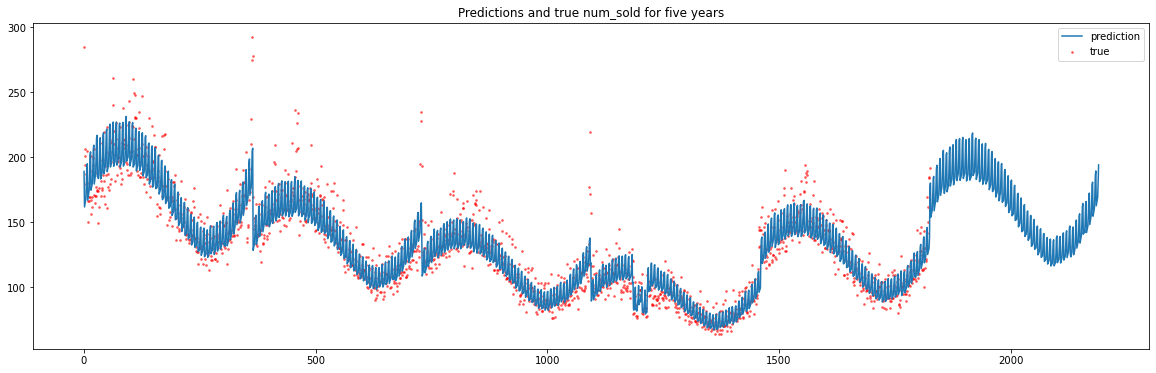

In [453]:
model1 = build_model(X_scaled, y.ravel())
resid_plot('Argentina', 'Kagglazon', 'Using LLMs to Write Better', model1, make_features, features)

Currently the model could not adjust to growth/decline in each year. 

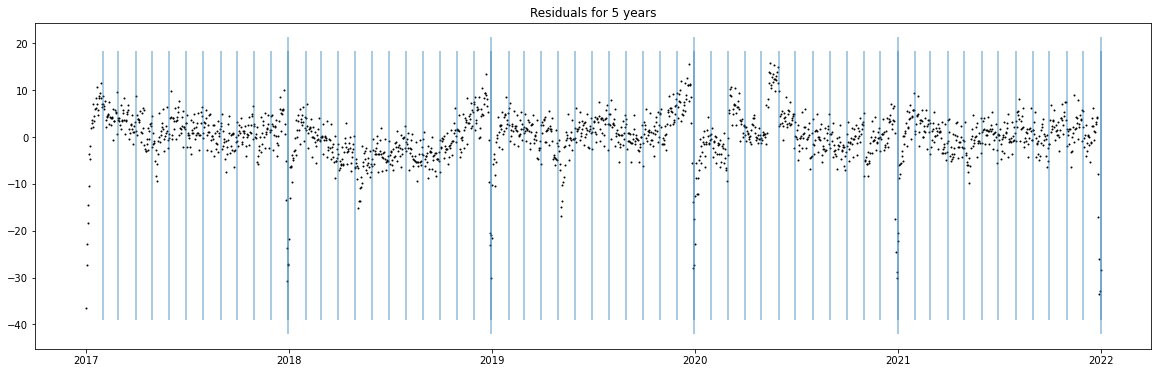

In [454]:
train_eng['pred'] = np.exp(model1.predict(scaler.transform(train_eng.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng.groupby(train_eng['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

def plot_all_residuals(residuals):
    plt.figure(figsize=(20,6))
    plt.scatter(residuals.index,
                residuals,
                s=1, color='k')
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='M'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='Y'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.title('Residuals for 5 years')
    plt.show()
    
plot_all_residuals(residuals)

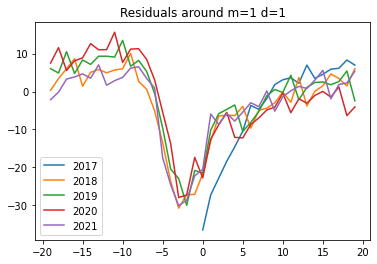

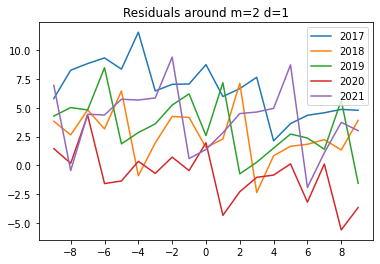

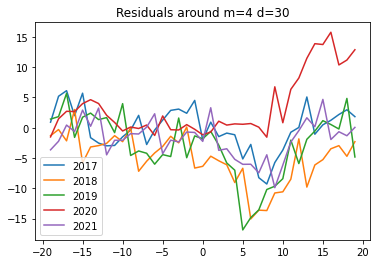

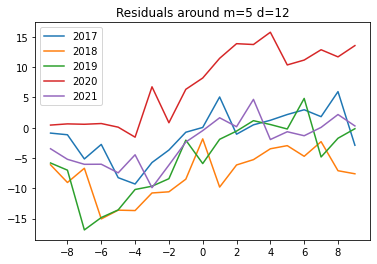

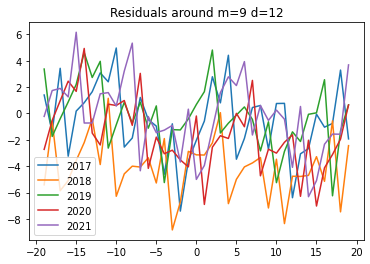

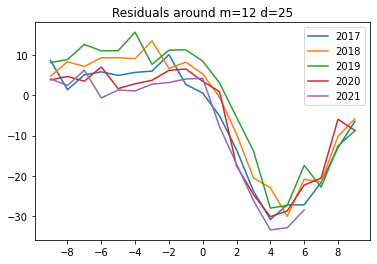

In [455]:
def plot_around(residuals, m, d, w):
    """Plot residuals in an interval of with 2*w around month=m and day=d"""
    plt.figure()
    plt.title(f"Residuals around m={m} d={d}")
    for y in np.arange(2017, 2022):
        d0 = pd.Timestamp(date(y, m, d))
        residual_range = residuals[(residuals.index > d0 - timedelta(w)) & 
                                   (residuals.index < d0 + timedelta(w))]
        plt.plot([(r - d0).days for r in residual_range.index], residual_range, label=str(y))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
    plt.legend()
    plt.show()
plot_around(residuals, 1, 1, 20)
plot_around(residuals, 2, 1, 10)
plot_around(residuals, 4, 30, 20)
plot_around(residuals, 5, 12, 10)
plot_around(residuals, 9, 12, 20)
plot_around(residuals, 12, 25, 10)

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

High residuals mainly are located in:
- Early January (New Year)
- Around end of April to early May (Post-Easter/Golden week in Japan)

Additional interesting months from EDA:
- February (lowest sales of IYC, TTL, WFIP)
- March - May (Highest sales of WB)
- May (Highest sales of TTL in Japan)
- June (lowest sales of WMKC)
- July (lowest sales of WMKC in Estonia)
- September (lowest sales of WB)
- Japan does not consider Christmas as a national holiday

We could use them as an interaction with addition of holidays such as Christmas and New Year that accomodates high sales during that time.

In [456]:
def eng_easter(data):
    df = data.copy()
    easter_date = df.date.apply(lambda date: pd.Timestamp(easter(date.year)))       
    for day in (list(range(-2, 11))+list(range(30,38))):
        df[f'Easter_{day}'] = (df.date - easter_date).dt.days.eq(day)
        
    for col in df.columns :
            if 'Easter' in col : df = pd.get_dummies(df, columns = [col], drop_first=True)
    
    return df

In [457]:
def holiday_mapper(data):
    df = data.copy()
    period = range(2017, 2022, 1)
    for i in list(set(train_data_ori['country'])):
        holidays = CountryHoliday(i, years=period)
        df[f'{i}_Holiday'] = df['date'].map(holidays).fillna('Not Holiday')
        df[f'Is_Holiday_{i}'] = np.where(df[f'{i}_Holiday']=='Not Holiday',0,1)
        df[f'{i}_Holiday'] = df[f'{i}_Holiday'].apply(lambda x: x 
                                                  if x != 'Asunción de la Virgen (Trasladado)' 
                                                  else 'Not Holiday')
    for i in list(set(train_data_ori['country'])):
        df.drop(f'{i}_Holiday', axis=1, inplace=True)
    
#     # Applying christmas and excluding Japan
#     df['is_christmas_ny'] = (
#         (df.country!='Japan') &
#         ((df.Month==12) & ((df.Day>=25) & (df.Day<=31)) | (df.Month==1) & (df.Day==1))
#     )
    
    christmas_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,25))       
    for day in (list(range(-5, 5))+list(range(7,12))):
        df[f'Christmas_{day}'] = np.where(df.country!='Japan',(df.date - christmas_date).dt.days.eq(day),0)
    
    golden_week_date = df.date.apply(lambda date: pd.Timestamp(date.year,5,3))       
    for day in (list(range(-7, -2))+list(range(6))):
        df[f'golden_week_{day}'] = np.where(df.country=='Japan',(df.date - golden_week_date).dt.days.eq(day),0)
    
#     df['golden_week_Japan'] = \
#         df.apply(lambda x: 1
#                  if ((x.country=='Japan')&((x.Month==4) & (x.Day>=29)) | ((x.Month==5) & (x.Day<=5)))
#                  else 0, axis=1)
    
    return df

In [31]:
CountryHoliday('Japan', years=range(2017, 2022, 1))

{datetime.date(2017, 1, 1): '元日', datetime.date(2017, 1, 9): '成人の日', datetime.date(2017, 2, 11): '建国記念の日', datetime.date(2017, 3, 20): '春分の日', datetime.date(2017, 4, 29): '昭和の日', datetime.date(2017, 5, 3): '憲法記念日', datetime.date(2017, 5, 4): 'みどりの日', datetime.date(2017, 5, 5): 'こどもの日', datetime.date(2017, 7, 17): '海の日', datetime.date(2017, 8, 11): '山の日', datetime.date(2017, 9, 18): '敬老の日', datetime.date(2017, 9, 23): '秋分の日', datetime.date(2017, 10, 9): '体育の日', datetime.date(2017, 11, 3): '文化の日', datetime.date(2017, 11, 23): '勤労感謝の日', datetime.date(2017, 12, 23): '天皇誕生日', datetime.date(2017, 1, 2): '振替休日', datetime.date(2018, 1, 1): '元日', datetime.date(2018, 1, 8): '成人の日', datetime.date(2018, 2, 11): '建国記念の日', datetime.date(2018, 3, 21): '春分の日', datetime.date(2018, 4, 29): '昭和の日', datetime.date(2018, 5, 3): '憲法記念日', datetime.date(2018, 5, 4): 'みどりの日', datetime.date(2018, 5, 5): 'こどもの日', datetime.date(2018, 7, 16): '海の日', datetime.date(2018, 8, 11): '山の日', datetime.date(2018, 9, 17): '敬老

In [458]:
def add_trends(data):
    df = data.copy()
    df['feb_IYC'] = np.where((df.Month==2)&(df['Using LLMs to Improve Your Coding']==1), 1, 0)
    df['feb_TTL'] = np.where((df.Month==2)&(df['Using LLMs to Train More LLMs']==1), 1, 0)
    df['feb_WFIP'] = np.where((df.Month==2)&(df['Using LLMs to Win Friends and Influence People']==1), 1, 0)
    df['mar_WB'] = np.where((df.Month==3)&(df['Using LLMs to Write Better']==1), 1, 0)
    df['apr_WB'] = np.where((df.Month==4)&(df['Using LLMs to Write Better']==1), 1, 0)
    df['may_WB'] = np.where((df.Month==5)&(df['Using LLMs to Write Better']==1), 1, 0)
    df['jun_WMKC'] = np.where((df.Month==6)&(df['Using LLMs to Win More Kaggle Competitions']==1), 1, 0)
    df['jul_WMKC_Est'] = np.where(
                    (df['country_Estonia']==1)&(df.Month==7)&(df['Using LLMs to Win More Kaggle Competitions']==1), 1, 0)
    df['sept_WB'] = np.where((df.Month==9)&(df['Using LLMs to Write Better']==1), 1, 0)
    
    return df

In [459]:
def make_features2(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    print("adding easter features ...")
    tempDf = eng_easter(tempDf)
    print("adding holiday features ...")
    tempDf = holiday_mapper(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    print("adding trends ...")    
    tempDf = add_trends(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    return tempDf

In [460]:
train_eng2 = make_features2(train_data_ori)
train_eng2.set_index('date', drop=False, inplace=True)
train_eng2.iloc[12000:12010]

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,WB_cos2,feb_IYC,feb_TTL,feb_WFIP,mar_WB,apr_WB,may_WB,jun_WMKC,jul_WMKC_Est,sept_WB
date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,0,0,0
2017-06-10,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,0,0,0
2017-06-10,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,0,0,0
2017-06-10,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,1,0,0
2017-06-10,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.738326,0,0,0,0,0,0,0,0,0
2017-06-10,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,0,0,0
2017-06-10,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,0,0,0
2017-06-10,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,0,0,0
2017-06-10,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000,0,0,0,0,0,0,1,0,0


In [461]:
X = train_eng2.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng2['num_sold'].values).reshape(-1,1)

In [462]:
features = X.columns.to_list()
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_weekend', 'is_weekday', 'first_half', 'second_half', 'world_covid', 'covid_-5', 'covid_-4', 'covid_-3', 'covid_-2', 'covid_-1', 'covid_0', 'covid_1', 'covid_2', 'covid_3', 'covid_4', 'covid_5', 'covid_6', 'covid_7', 'covid_8', 'covid_9', 'covid_10', 'covid_11', 'covid_12', 'covid_13', 'covid_14', 'covid_15', 'covid_16', 'covid_17', 'covid_18', 'covid_19', 'covid_20', 'covid_21', 'covid_22', 'covid_23', 'covid_24', 'covid_25', 'covid_26', 'covid_27', 'covid_28', 'covid_29', 'covid_30', 'covid_31', 'covid_32', 'covid_33', 'covid_34', 'covid_35', 'covid_36', 'covid_37', 'gdp', 'Easter_-2_True', 'Easter_-1_True', 'Easter_0_True', 'Easter_1_True', 'Easter_2_True', 'Easter_3_True', 'Easter_4_True', 'Easter_5_True', 'Easter_6_True', 'Easter_7_True', 'Easter_8_True', 'Easter_9_True', 'Easter_10_True', 'Easter_30_True', 'Easter_31_True', 'Easter_32_True', 'Easter_33_True', 'Eas

In [463]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...


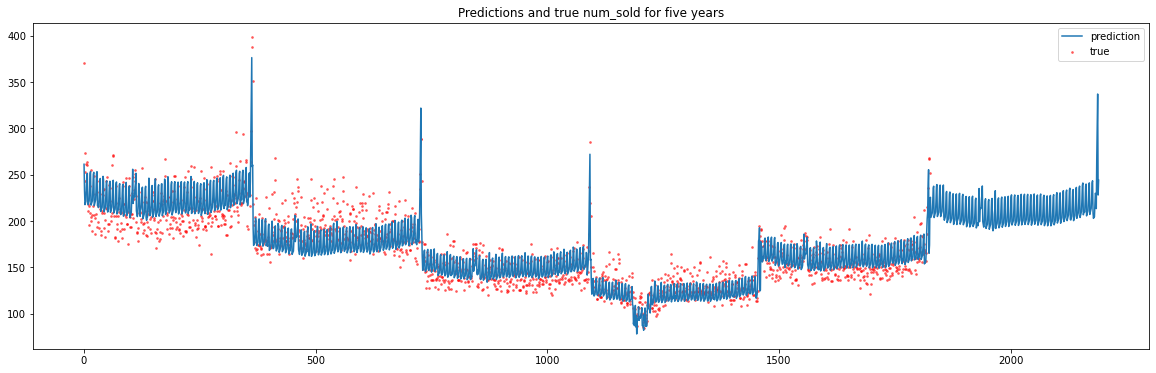

In [476]:
model2 = build_model(X_scaled, y.ravel())
resid_plot('Argentina', 'Kagglazon', 'Using LLMs to Train More LLMs', model2, make_features2, features)

In [465]:
train_eng2['pred'] = np.exp(model2.predict(scaler.transform(train_eng2.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng2.groupby(train_eng2['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

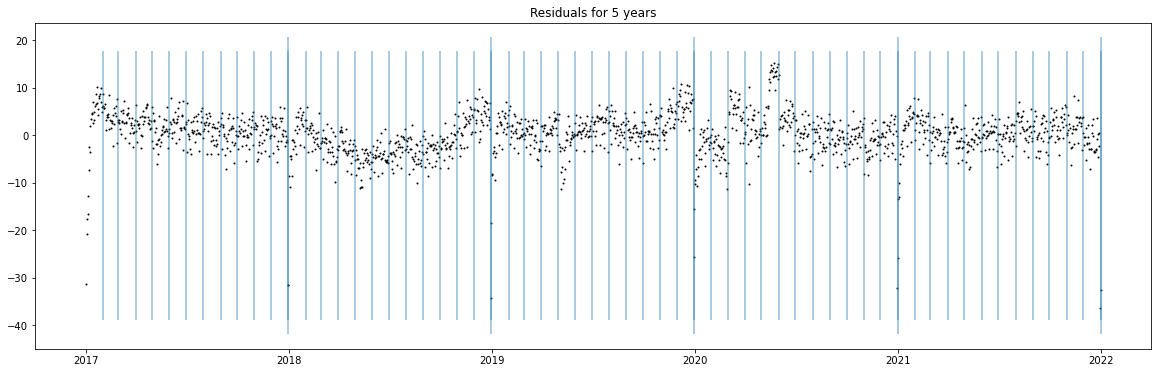

In [466]:
plot_all_residuals(residuals)

In [467]:
calculate_smape(np.array(train_eng.num_sold), np.array(train_eng.pred))

6.32

In [468]:
calculate_smape(np.array(train_eng2.num_sold), np.array(train_eng2.pred))

5.99

# Submissions

In [469]:
test_eng = make_features2(test_data_ori)
test_eng

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...


,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,WB_cos2,feb_IYC,feb_TTL,feb_WFIP,mar_WB,apr_WB,may_WB,jun_WMKC,jul_WMKC_Est,sept_WB
0,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
1,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
2,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
3,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
4,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.999407,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0.000000,0,0,0,0,0,0,0,0,0


In [470]:
y_hat = np.exp(model2.predict(scaler.transform(test_eng[features])))

In [816]:
sub1 = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub1

,id,num_sold
0,136950,46.497919
1,136951,46.341807
2,136952,7.071841
3,136953,43.450334
4,136954,35.207637
...,...,...
27370,164320,684.534733
27371,164321,680.569199
27372,164322,103.848215
27373,164323,637.998232


In [817]:
sub1.to_csv('submissions/submission1.csv', index=False)

In [471]:
sub2 = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub2

,id,num_sold
0,136950,39.225350
1,136951,38.989557
2,136952,5.963445
3,136953,36.570019
4,136954,29.794929
...,...,...
27370,164320,514.978046
27371,164321,510.627451
27372,164322,78.123851
27373,164323,479.140724


In [472]:
sub2.to_csv('submissions/submission2.csv', index=False)